<a href="https://colab.research.google.com/github/deryabol/Machine_Learning/blob/main/MNIST_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#TesorFlow
import tensorflow as tf


In [66]:
#MNIST veri setini Keras kütüphanesinden yüklüyoruz
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.mnist.load_data()

In [67]:
# train ve test setleri x ve y olarak tek bir değişkende toplayalım
X = np.concatenate([(X_train.reshape((X_train.shape[0], 28 * 28)).astype('float64')),
                    (X_test.reshape((X_test.shape[0], 28 * 28)).astype('float64'))])
y = np.concatenate([y_train, y_test])

In [68]:
# X ve y setlerindeki toplam gözlem sayısını görüntüleyelim.
print(f'X setindeki {len(X)} gözlem var')
print(f'y setindeki {len(y)} gözlem var\n')

X setindeki 70000 gözlem var
y setindeki 70000 gözlem var



In [69]:
#x ve y test setlerin boyutlarını görüntüleyelim
print(f' x_train setinin boyutu: {X_train.shape}')
print(f'x_test setinin boyutu:{X_test.shape}\n')

print(f'y_train setinin boyutu:{y_train.shape}')
print(f'y_test setinin boyutu:{y_test.shape}\n')

 x_train setinin boyutu: (60000, 28, 28)
x_test setinin boyutu:(10000, 28, 28)

y_train setinin boyutu:(60000,)
y_test setinin boyutu:(10000,)



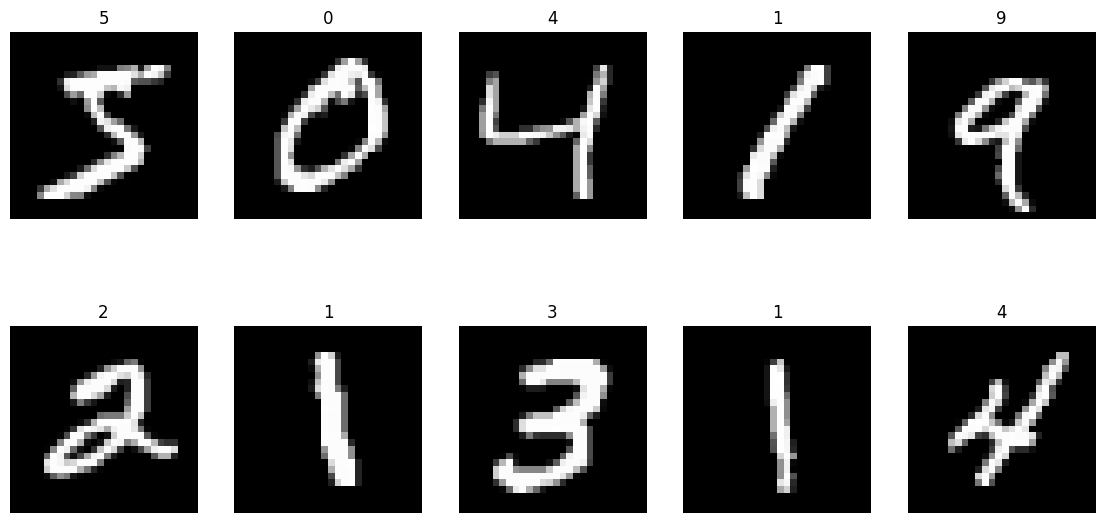

In [70]:
#ilk 10 gözlemi görüntüleyelim

plt.figure(figsize = (14, 7))

for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i], 'gray')
  plt.title(y_train[i])
  plt.axis('off')


In [18]:
from matplotlib import colormaps
list(colormaps)[:5]

['magma', 'inferno', 'plasma', 'viridis', 'cividis']

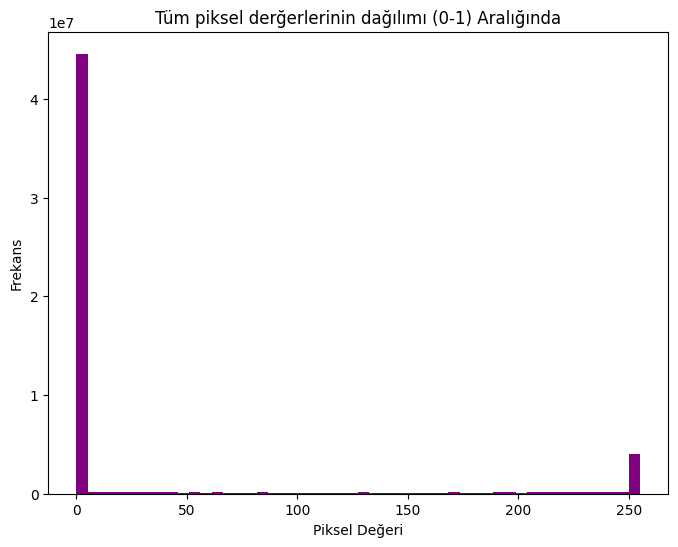

In [71]:
#Görsellerdeki piksel yoğunluğunu inceleyeim
plt.figure(figsize=(8, 6))
plt.hist(X.flatten(),bins=50, color='purple')
plt.title('Tüm piksel derğerlerinin dağılımı (0-1) Aralığında')
plt.xlabel('Piksel Değeri')
plt.ylabel('Frekans')
plt.show()


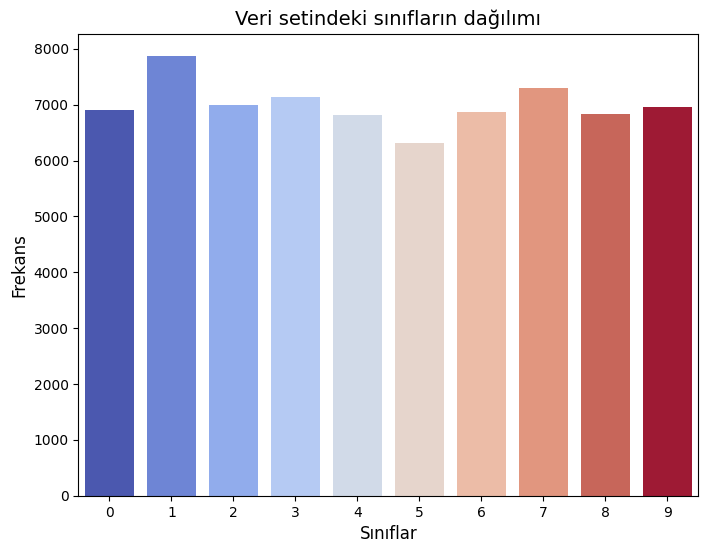

In [72]:
#Tüm veri setindeki sınıf dağılımını görüntüleyelim
plt.figure(figsize=(8, 6))

sns.countplot(x = y, palette ='coolwarm', hue= y, legend= False)

plt.title('Veri setindeki sınıfların dağılımı', fontsize =14)
plt.xlabel('Sınıflar', fontsize =12)
plt.ylabel('Frekans', fontsize =12)
plt.show()


In [73]:
#28*28 boyutlarında olan görselleri flatten (düzleştirilmiş ) hale getirmemiz gerekiyor
#Arkasından herbir pikseli normalize edebilmek için 255'e bölüyoruz (gray scale)

X_train = X_train.reshape((X_train.shape[0], 28 *28)).astype('float64')/255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float64')/255

In [74]:
#Flutten setlerin boyutlarına tekrar bakalım
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [75]:
#Train setini train ve validation olarak ayıralım
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [76]:
y_train[:5]
#Train setinin ilk 5 gözlemini görüntüleyelim. Gördüğümüz süzere sınıf değerleri uint8 veri tipinde



array([5, 0, 1, 6, 1], dtype=uint8)

In [77]:
#Sınıflandırma yapabilmek için bu değerleri encode ederek kategorik hale çevireceğiz
#Encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)


In [78]:
#encode edilen değerleri görüntüleyelim. Herbir gözlem tüm sınıf değerlerin sayısı kadar 0 ve 1 den oluşan array e dönüşür.
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [79]:
# ANN için sequential modeli başlatalım

model = tf.keras.models.Sequential()

#Model katmanlarını ekleyelim
#Input Layer
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 *28,)))

#Hidden Layers
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output Layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
#Modeli compile edelim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
#Modeli fit ederek results değişkenlerinde saklayalım
results = model.fit(X_train, y_train, epochs=10, batch_size =128, validation_data =(X_val, y_val))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8616 - loss: 0.4807 - val_accuracy: 0.9622 - val_loss: 0.1266
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9681 - loss: 0.1046 - val_accuracy: 0.9717 - val_loss: 0.0918
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9819 - loss: 0.0575 - val_accuracy: 0.9746 - val_loss: 0.0865
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9867 - loss: 0.0416 - val_accuracy: 0.9790 - val_loss: 0.0743
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9904 - loss: 0.0283 - val_accuracy: 0.9763 - val_loss: 0.0873
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9930 - loss: 0.0226 - val_accuracy: 0.9772 - val_loss: 0.0890
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9926 - loss: 0.0217 - val_accuracy: 0.9773 - val_loss: 0.0862
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accu

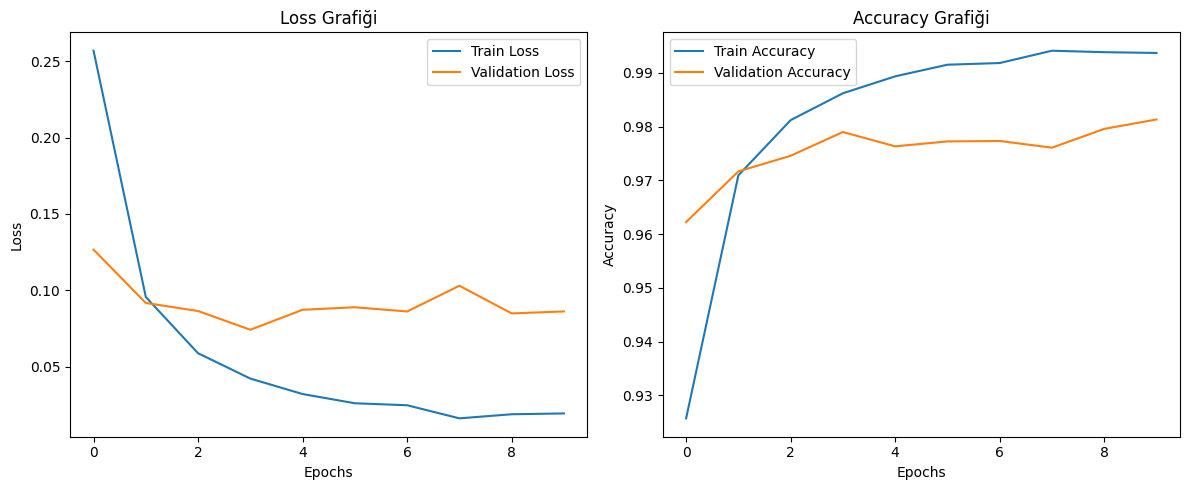

In [82]:
# Şimdi train ve validation setlerinin performanslarını karşılaştıralım.

# Figürü oluşturuyoruz.
plt.figure(figsize=(12, 5))

# Loss değeri için grafikleri çizdirelim.
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy score grafikleri çizdirelim.
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
#Şimdi test seti ile tahmin işlemini gerçekleştiripp skora bakalım

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1) #argmax ile en yüksek olasılıklı sınıf değerini alıyoruz

# test için loss ve accuracy değerlerinin alalım.
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Loss:',  test_loss)
print(f'Accuracy score:', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Loss: 0.0806593969464302
Accuracy score: 0.9797000288963318


In [85]:
#İlk tahmin değerinin olasılıklarını görüntüleyelim
y_pred[0]

array([5.3724903e-11, 2.4513009e-09, 4.3890283e-09, 1.0222700e-08,
       2.1732591e-11, 1.4668896e-11, 4.5422904e-15, 9.9999982e-01,
       1.2514676e-12, 1.7241861e-07], dtype=float32)

In [87]:
#supress etmek için
np.set_printoptions(suppress=True)

print(y_pred[0])

[0.         0.         0.         0.00000001 0.         0.
 0.         0.9999998  0.         0.00000017]


In [89]:
#ilk değerin gerçek değerini görüntüleyelim
print(y_test[0])

print(np.argmax(y_test[0]))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [90]:
#ilk 10 tahmin değerini görüntüleyelim
y_pred_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

<BarContainer object of 10 artists>

<Figure size 600x300 with 0 Axes>

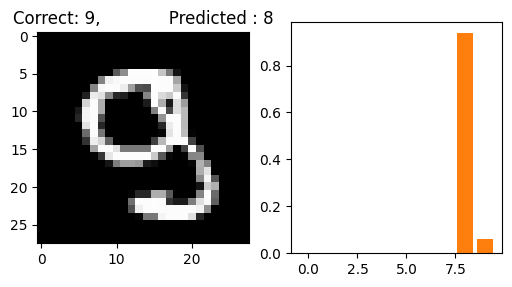

In [96]:
# Yanlış tahmin olan görselden bir tanesini görselleştirdik
k =2
ix = (np.argmax(y_test, axis = 1) != y_pred_classes)

plt.figure(figsize =(6, 3))
k =2
ix = (np.argmax(y_test, axis = 1) != y_pred_classes)

plt.figure(figsize =(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(X_test[ix][k].reshape(28,28), "gray")
plt.title(f"Correct: {np.argmax(y_test, axis = 1)[ix][k]}, \
            Predicted : {y_pred_classes[ix][k]}")

plt.subplot(1,2,2)
plt.bar(np.arange(10), y_pred[ix][k])

plt.subplot(1,2,2)
plt.bar(np.arange(10), y_pred[ix][k])